In [1]:
import os, sys
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE

from numpy import set_printoptions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB


In [2]:
exps_dir = "../../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/feature1"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42


In [3]:
x_train=pd.read_excel(f'{save_dir}/x_train.xlsx')
y_train=pd.read_excel(f'{save_dir}/y_train.xlsx')
x_test=pd.read_excel(f'{save_dir}/x_test.xlsx')
y_test=pd.read_excel(f'{save_dir}/y_test.xlsx')
class_weights_dict=dict(np.load(f'{exps_dir}/feature1/class_weights_dict.npz',allow_pickle=True))['class_weights_dict']
class_weights_dict = {key: value for key, value in class_weights_dict.item().items()}
class_weights_dict

{0: 1.0, 1: 1.0}

In [4]:
feature_selection=dict(np.load(f'{exps_dir}/feature1/feature_model_selection.npz',allow_pickle=True))['feature_model_selection']
feature_selection = {key: value for key, value in feature_selection.item().items()}
feature_selection

{'LR': ['age',
  'auto_year',
  'collision_type',
  'high_hour',
  'incident_severity',
  'incident_type',
  'injury_claim',
  'number_of_vehicles_involved',
  'policy_csl',
  'vehicle_claim'],
 'LDA': ['age',
  'auto_year',
  'collision_type',
  'high_hour',
  'incident_severity',
  'incident_type',
  'months_as_customer',
  'number_of_vehicles_involved',
  'police_report_available',
  'policy_csl'],
 'DTC': ['auto_make',
  'auto_model',
  'capital-loss',
  'day_policy_bind_date',
  'incident_severity',
  'insured_hobbies',
  'month_policy_bind_date',
  'policy_annual_premium',
  'vehicle_claim',
  'year_policy_bind_date'],
 'RD': ['capital-loss',
  'day_incident_date',
  'incident_severity',
  'injury_claim',
  'insured_hobbies',
  'month_policy_bind_date',
  'property_claim',
  'total_claim_amount',
  'vehicle_claim',
  'year_policy_bind_date'],
 'KNC': ['policy_csl',
  'collision_type',
  'incident_severity',
  'authorities_contacted',
  'incident_city',
  'property_damage',
  'pol

### Kết luận:
- Nhóm xây dựng một mạng Netual network ứng dụng kỹ thuật trong học sâu như callbacks, đánh trọng số,.... Nhưng không khắc phục được tình trạng (imbalanced variable).

# 6. Đánh giá và lựa chọn mô hình học máy có giám sát

In [5]:
def check_model(name,model,X,Y,names,results,scoring):
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
    cv_results=cross_val_score(model,X[feature_selection[name]],Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg=scoring.title()+" %s: %.3f%% (%.3f%%)"%(name,cv_results.mean()*100,cv_results.std()*100)
    print(msg)       
    return 

Accuracy LR: 75.152% (2.462%)
Accuracy LDA: 77.273% (4.391%)
Accuracy DTC: 77.273% (3.455%)
Accuracy RD: 75.758% (2.535%)
Accuracy KNC: 73.333% (4.556%)
Accuracy NB: 66.364% (2.424%)
Accuracy SVM: 74.545% (4.830%)
Accuracy NN: 74.545% (4.221%)
Accuracy BG: 74.848% (3.120%)


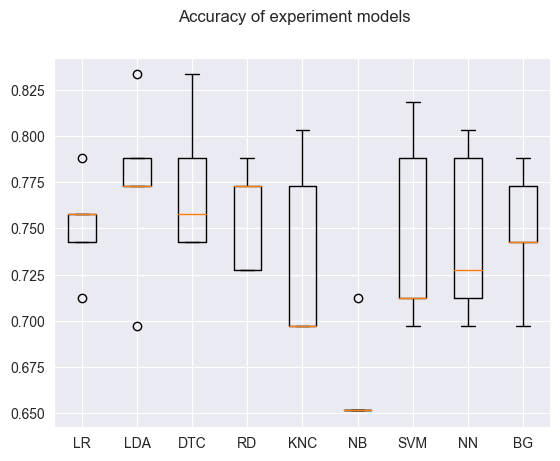

Precision LR: 62.300% (20.534%)
Precision LDA: 68.131% (18.536%)
Precision DTC: 54.201% (14.441%)
Precision RD: 56.488% (10.715%)
Precision KNC: 0.000% (0.000%)
Precision NB: 41.328% (7.937%)
Precision SVM: 62.540% (36.866%)
Precision NN: 47.894% (11.152%)
Precision BG: 53.247% (6.402%)


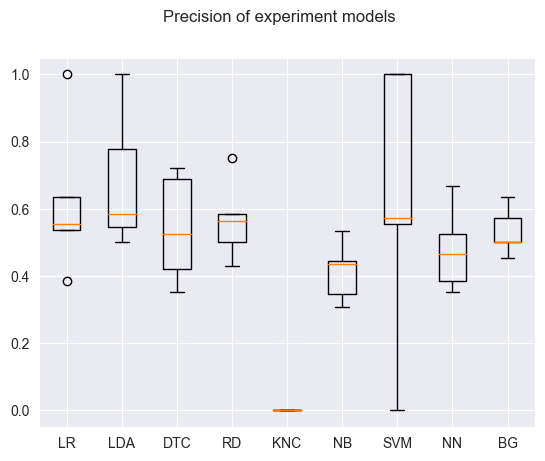

Recall LR: 32.359% (6.401%)
Recall LDA: 35.769% (10.744%)
Recall DTC: 57.436% (4.460%)
Recall RD: 40.897% (5.537%)
Recall KNC: 0.000% (0.000%)
Recall NB: 54.308% (8.251%)
Recall SVM: 14.026% (13.893%)
Recall NN: 41.026% (8.849%)
Recall BG: 44.359% (10.345%)


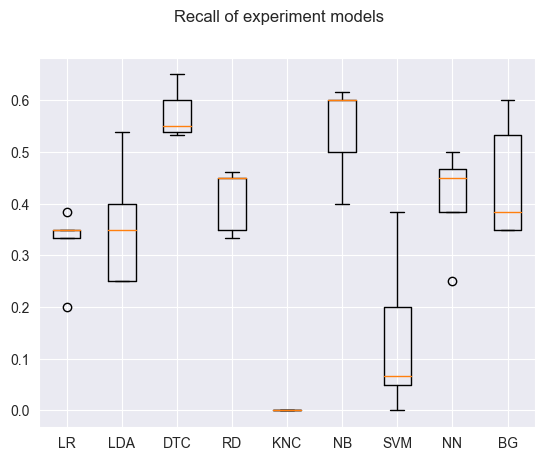

F1 LR: 40.209% (4.047%)
F1 LDA: 44.753% (7.666%)
F1 DTC: 55.227% (9.742%)
F1 RD: 46.889% (5.667%)
F1 KNC: 0.000% (0.000%)
F1 NB: 45.644% (3.301%)
F1 SVM: 19.422% (16.155%)
F1 NN: 49.822% (8.021%)
F1 BG: 47.631% (6.605%)


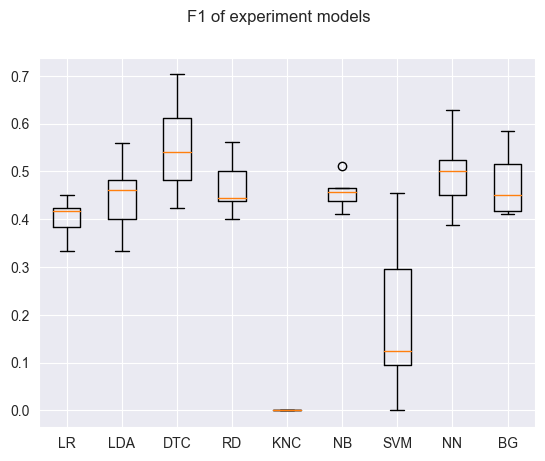

In [44]:
num_folds=5
seed=7
models=[]

models.append(('KNC',KNeighborsClassifier(n_neighbors=100)))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(class_weight=class_weights_dict)))
models.append(('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)))
models.append(('GD',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)))
#models.append(('Naive',MultinomialNB()))


RandomForestClassifier(n_estimators=500, 
                                max_depth=10, 
                                min_samples_split=400, 
                                random_state=12, 
                                class_weight=class_weights_dict,
                                )

results=[]
names=[]
scorings=['accuracy','precision','recall','f1']
#check_model('LR',LogisticRegression(class_weight=class_weights_dict),X_logistic,Y,names,results,scorings)
#check_model('LDA',LinearDiscriminantAnalysis(),X_linear,Y,names,results,scorings)
#check_model('CART',DecisionTreeClassifier(class_weight=class_weights_dict),X_decision,Y,names,results,scorings)
#check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),X_forest,Y,names,results,scorings)


for scoring in scorings:
    check_model('LR',LogisticRegression(class_weight=class_weights_dict),x_test,y_test,names,results,scoring)
    check_model('LDA',LinearDiscriminantAnalysis(),x_test,y_test,names,results,scoring)
    check_model('DTC',DecisionTreeClassifier(class_weight=class_weights_dict),x_test,y_test,names,results,scoring)
    check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),x_test,y_test,names,results,scoring)
    check_model('KNC',KNeighborsClassifier(n_neighbors=100),x_test,y_test,names,results,scoring)
    check_model('NB',GaussianNB(),x_test,y_test,names,results,scoring)
    check_model('SVM',SVC(class_weight=class_weights_dict),x_test,y_test,names,results,scoring)
    check_model('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),x_test,y_test,names,results,scoring)
    check_model('BG',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),x_test,y_test,names,results,scoring)
    fig=plt.figure()
    fig.suptitle(f'{scoring.title()} of experiment models')
    ax=fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.savefig(f'So sánh tương quan {scoring.title()} các loại mô hình.png')
    plt.show()
    results=[]
    names=[]
names=[
    'LR',
    'LDA',
    'DTC',
    'RD',
    'KNC',
    'NB',
    'SVM',
    'NN',
    'BG']

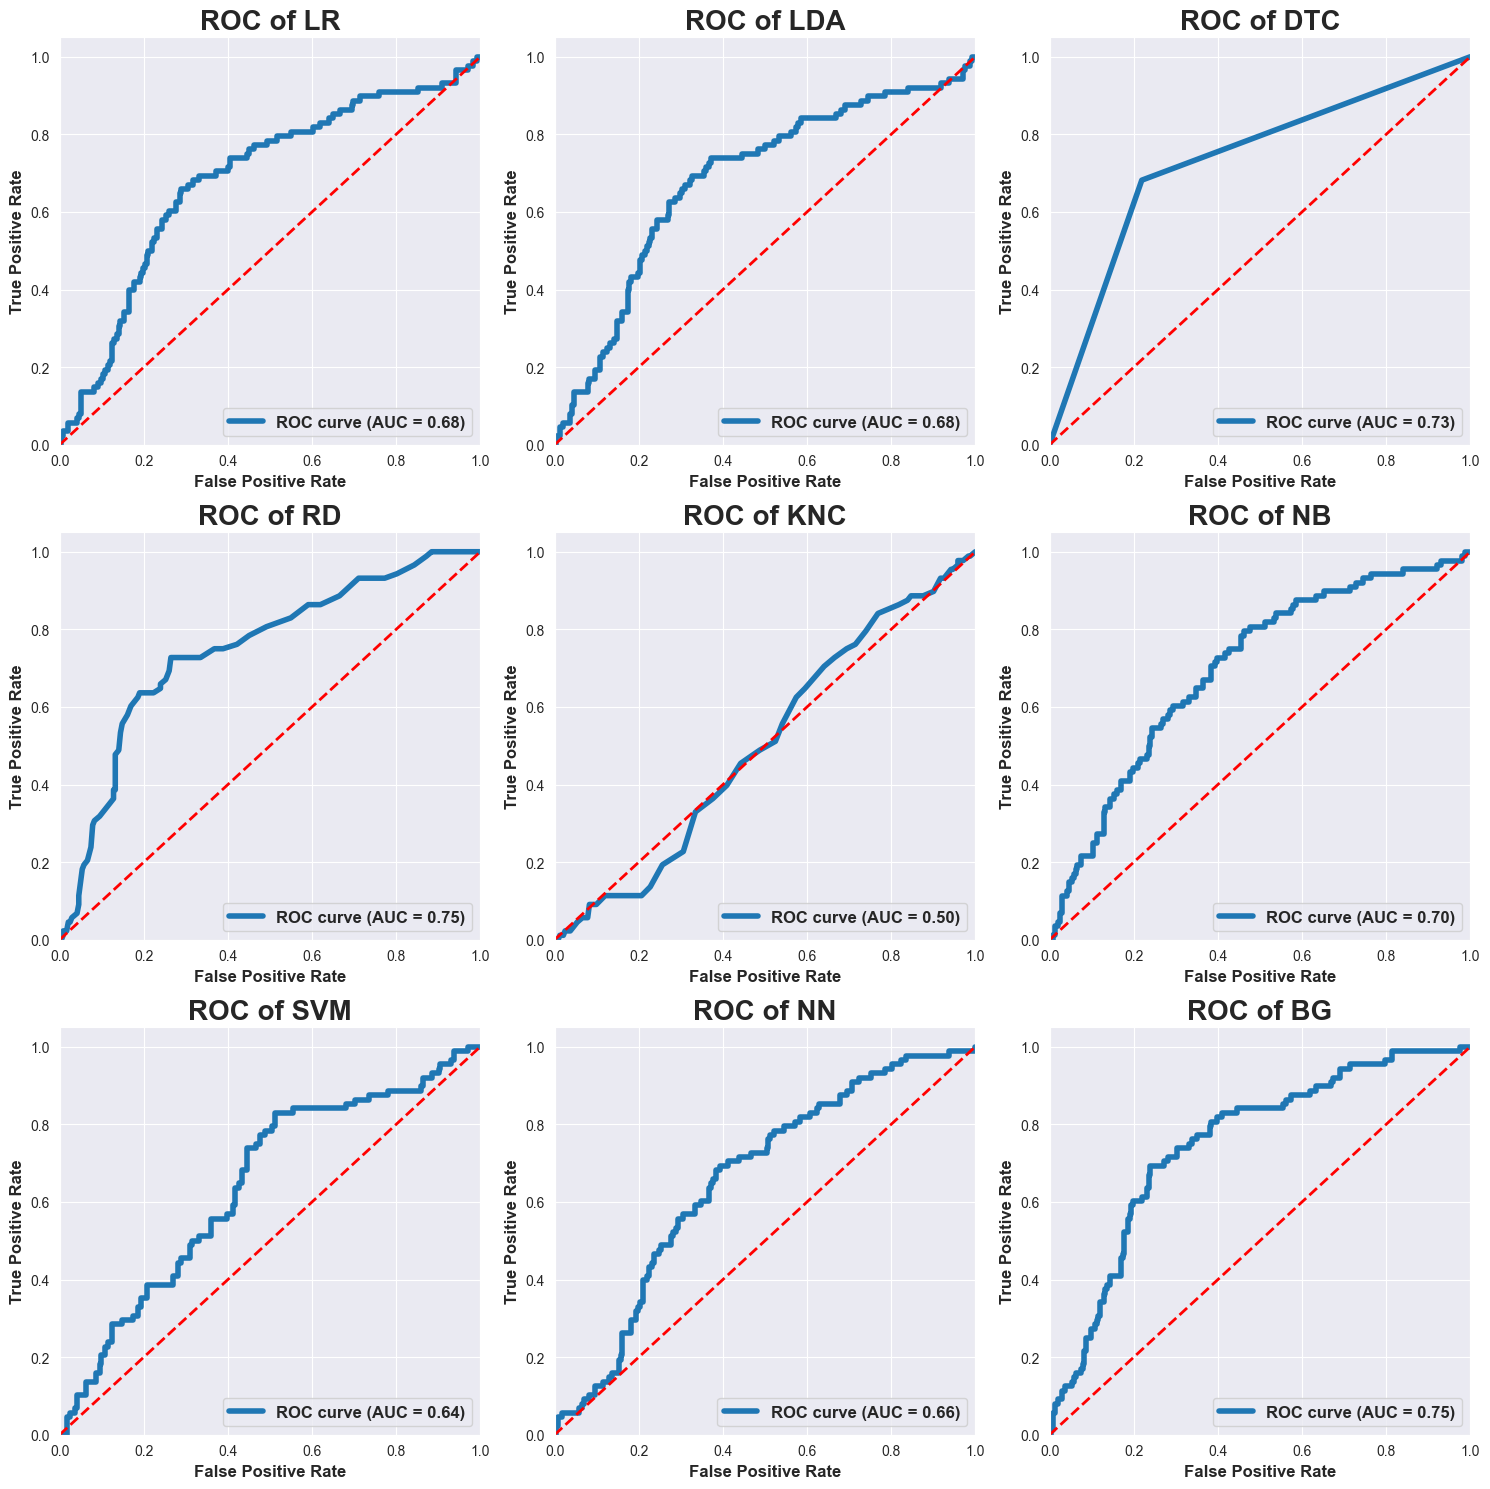

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, name, X_test, y_test, ax):
    model.fit(x_train,y_train)
    try:
        # Huấn luyện mô hình trên dữ liệu huấn luyện
        y_scores = model.predict_proba(X_test)[:,1]
    except:
        y_scores = model.decision_function(X_test)
    
    # Tính toán FPR và TPR từ decision function
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    
    # Tính diện tích dưới đường cong ROC (AUC)
    roc_auc = auc(fpr, tpr)

    # Vẽ đường cong ROC
    ax.plot(fpr, tpr, lw=4, label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=12, weight='bold')  # Đặt kích thước và độ dày cho nhãn trục x
    ax.set_ylabel('True Positive Rate', fontsize=12, weight='bold')   # Đặt kích thước và độ dày cho nhãn trục y
    ax.set_title(f'ROC of {name}',fontsize=20, weight='bold')  # Đặt kích thước và độ dày cho tiêu đề
    ax.legend(loc="lower right", prop={'size': 12, 'weight': 'bold'})  # Đặt kích thước và độ dày cho chú thích
        

# Tạo một lưới đồ thị 3x3
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
models=[LogisticRegression(class_weight=class_weights_dict),LinearDiscriminantAnalysis(),DecisionTreeClassifier(class_weight=class_weights_dict),RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),KNeighborsClassifier(n_neighbors=100),GaussianNB(),SVC(class_weight=class_weights_dict),MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)]
# Lặp qua từng mô hình và vẽ đường cong ROC
for i, model in enumerate(models):
    name=names[i]
    row = i // 3
    col = i % 3
    plot_roc_curve(model,name , x_test, y_test, ax=axes[row, col])

# Cân chỉnh khoảng cách giữa các subplot
plt.tight_layout()

# Hiển thị đồ thị
plt.show()


## 2 Mô hình đạt điểm cao nhất là:
    -SVM: Support Vector Machine
    -DTC: DecisionTreeClassifer
    -RD : Random Forest


In [ ]:
evaluate_result={}

### Mô hình SVM
      -Tỉ lệ đoán sai ở lớp bị đánh trọng số thấp cao

In [ ]:
supervied_features=x_train[feature_selection['SVM']]
supervied_target=y_train
model1=SVC(class_weight=class_weights_dict)
model1.fit(supervied_features,supervied_target)

In [ ]:
predictions = model1.predict(x_test[feature_selection['SVM']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['SVM']=classification_report(y_test, predictions)

print(classification_report(y_test, predictions))

### DecisionTreeClassifer

In [ ]:
supervied_features=x_train[feature_selection['DTC']]
supervied_target=y_train
model2=DecisionTreeClassifier(class_weight=class_weights_dict)
model2.fit(supervied_features,supervied_target)

In [ ]:
predictions = model2.predict(x_test[feature_selection['DTC']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['DecisionTreeClassifer']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

### Random Forest

In [ ]:
supervied_features=x_train[feature_selection['RD']]
supervied_target=y_train
model3=RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict)
model3.fit(supervied_features,supervied_target)

In [ ]:
predictions = model3.predict(x_test[feature_selection['RD']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['Random Forest']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

In [ ]:
for x,y in evaluate_result.items():
    print(x)
    print(y)

In [ ]:
def check_result(prediction):
    if isinstance(prediction, (np.ndarray, pd.Series)):
        prediction = prediction.item()  # Hoặc sử dụng prediction[0] hoặc prediction.iloc[0]
    if prediction==1:
        return "Y"
    else:
        return "N"

In [ ]:
def check_output(stt,model, X_test, Y_test):
    print(f"Lần thứ {stt}: ")
    indx = rd.randint(0, X_test.shape[0] - 1)  # Đảm bảo indx nằm trong giới hạn của DataFrame
    sample = X_test.iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model.predict(sample)
    Y_check = check_result(Y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        return True
    else: return False
    
    

In [ ]:
n_check=10
solandung=0
for i in range(n_check):
    if check_output(i+1,model2, x_test[feature_selection['RD']], y_test):
        solandung+=1


In [ ]:
print(f"Số lần dự đoán đúng: {solandung} chiếm khoảng {(solandung/n_check)*100}% tổng lần dự đoán")

In [ ]:
solandung=0
hopdonggianlan=0
for indx in range(len(x_test)):
    sample = x_test[feature_selection['RD']].iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model3.predict(sample)
    Y_check = check_result(y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        solandung+=1
        if Y_check=='Y':
            hopdonggianlan+=1
    


In [ ]:
print(f"Số lần dự đoán đúng trong lan kiểm tra: {solandung} chiếm khoảng {(solandung/len(x_test))*100}% tổng lần dự đoán")
print(f"Số hợp đồng gian lận trong lần kiểm tra: {hopdonggianlan} lần, chiếm khoảng {(hopdonggianlan/len(y_test[y_test['fraud_reported']==1]))*100}% số hợp đồng gian lận trong thực tế")
